In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import os
import json
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
cell_y_coord=0
cell_x_coord=0

In [3]:
birch_dir='/data/workflows/BONA-birch/output/'
black_spruce_dir='/data/workflows/BONA-black-spruce/output/'

gpp_tr='GPP_monthly_tr.nc'
gpp_sc='GPP_monthly_sc.nc'

npp_tr='NPP_monthly_tr.nc'
npp_sc='NPP_monthly_sc.nc'

rm_tr='RM_monthly_tr.nc'
rm_sc='RM_monthly_sc.nc'

rg_tr='RG_monthly_tr.nc'
rg_sc='RG_monthly_sc.nc'

rh_tr='RH_monthly_tr.nc'
rh_sc='RH_monthly_sc.nc'

ald_eq='ALD_yearly_eq.nc'
ald_tr='ALD_yearly_tr.nc'
ald_sc='ALD_yearly_sc.nc'

lwclayer_tr = 'LWCLAYER_monthly_tr.nc'
lwclayer_sc = 'LWCLAYER_monthly_sc.nc'

tlayer_tr = 'TLAYER_monthly_tr.nc'
tlayer_sc = 'TLAYER_monthly_sc.nc'

vegc_tr = 'VEGC_monthly_tr.nc'
vegc_sc = 'VEGC_monthly_sc.nc'
vegc_eq = 'VEGC_monthly_eq.nc'

lai_tr = 'LAI_monthly_tr.nc'

transpiration_tr = 'TRANSPIRATION_monthly_tr.nc'
eet_tr = 'EET_monthly_tr.nc'

ltrfalc_tr = 'LTRFALC_monthly_tr.nc'
shlwc_tr = 'SHLWC_monthly_tr.nc'
shlwc_eq = 'SHLWC_monthly_eq.nc'
deepc_eq = 'DEEPC_yearly_eq.nc'
minec_eq= 'MINEC_yearly_eq.nc'

burnveg_tr = 'BURNVEG2AIRC_monthly_tr.nc'

In [4]:
#GPP
gpp_bs_tr = xr.open_dataset(black_spruce_dir+gpp_tr)
tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()
gpp_bs_tr = gpp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_bs_tr = gpp_bs_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

#Burn
burn_bs_tr = xr.open_dataset(black_spruce_dir+burnveg_tr)
burn_bs_tr = burn_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
burn_bs_tr = burn_bs_tr.variables['BURNVEG2AIRC'][:, cell_y_coord, cell_x_coord]

#gpp_bs_sc = xr.open_dataset(black_spruce_dir+gpp_sc)
#sc_dates = gpp_bs_sc.indexes['time'].to_datetimeindex()
#gpp_bs_sc = gpp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#gpp_bs_sc = gpp_bs_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_bs_tr = xr.open_dataset(black_spruce_dir+npp_tr)
npp_bs_tr = npp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_bs_tr = npp_bs_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

#npp_bs_sc = xr.open_dataset(black_spruce_dir+npp_sc)
#npp_bs_sc = npp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#npp_bs_sc = npp_bs_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#ALD
ald_bs_tr = xr.open_dataset(black_spruce_dir+ald_tr)
ald_bs_tr = ald_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
ald_bs_tr = ald_bs_tr.variables['ALD'][:, cell_y_coord, cell_x_coord]

#ald_bs_sc = xr.open_dataset(black_spruce_dir+ald_sc)
#ald_bs_sc = ald_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#ald_bs_sc = ald_bs_sc.variables['ALD'][:, cell_y_coord, cell_x_coord]

#RM
rm_bs_tr = xr.open_dataset(black_spruce_dir+rm_tr)
rm_bs_tr = rm_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_bs_tr = rm_bs_tr.variables['RM'][:, :, :5, cell_y_coord, cell_x_coord]

#rm_bs_sc = xr.open_dataset(black_spruce_dir+rm_sc)
#rm_bs_sc = rm_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rm_bs_sc = rm_bs_sc.variables['RM'][:, :, :5, cell_y_coord, cell_x_coord]

#RG
rg_bs_tr = xr.open_dataset(black_spruce_dir+rg_tr)
rg_bs_tr = rg_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_bs_tr = rg_bs_tr.variables['RG'][:, :, :5, cell_y_coord, cell_x_coord]

#rg_bs_sc = xr.open_dataset(black_spruce_dir+rg_sc)
#rg_bs_sc = rg_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rg_bs_sc = rg_bs_sc.variables['RG'][:, :, :5, cell_y_coord, cell_x_coord]

#RH
rh_bs_tr_layer = xr.open_dataset(black_spruce_dir+rh_tr)
rh_bs_tr_layer = rh_bs_tr_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_bs_tr_layer = rh_bs_tr_layer.variables['RH'][:, :, cell_y_coord, cell_x_coord]
rh_bs_tr = rh_bs_tr_layer.sum(axis=1)

#rh_bs_sc_layer = xr.open_dataset(black_spruce_dir+rh_sc)
#rh_bs_sc_layer = rh_bs_sc_layer.convert_calendar('standard', use_cftime=True, align_on='date')
#rh_bs_sc_layer = rh_bs_sc_layer.variables['RH'][:, :, cell_y_coord, cell_x_coord]
#rh_bs_sc = rh_bs_sc_layer.sum(axis=1)

#LWCLAYER
lwclayer_bs_tr = xr.open_dataset(black_spruce_dir+lwclayer_tr)
lwclayer_bs_tr = lwclayer_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_bs_tr = lwclayer_bs_tr.variables['LWCLAYER'][:,:, cell_y_coord, cell_x_coord]

#lwclayer_bs_sc = xr.open_dataset(black_spruce_dir+lwclayer_sc)
#lwclayer_bs_sc = lwclayer_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#lwclayer_bs_sc = lwclayer_bs_sc.variables['LWCLAYER'][:,:, cell_y_coord, cell_x_coord]

#TLAYER
tlayer_bs_tr = xr.open_dataset(black_spruce_dir+tlayer_tr)
tlayer_bs_tr = tlayer_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_bs_tr = tlayer_bs_tr.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#tlayer_bs_sc = xr.open_dataset(black_spruce_dir+tlayer_sc)
#tlayer_bs_sc = tlayer_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#tlayer_bs_sc = tlayer_bs_sc.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#VEGC
vegc_bs_eq = xr.open_dataset(black_spruce_dir+vegc_eq)
vegc_bs_eq = vegc_bs_eq.to_dataframe().reset_index()
vegc_bs_eq = vegc_bs_eq.loc[(vegc_bs_eq['y']==cell_y_coord) & (vegc_bs_eq['x']==cell_x_coord) & (vegc_bs_eq['pft']<5)]

vegc_bs_tr = xr.open_dataset(black_spruce_dir+vegc_tr)
vegc_bs_tr = vegc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
vegc_bs_tr = vegc_bs_tr.to_dataframe().reset_index()
vegc_bs_tr = vegc_bs_tr.loc[(vegc_bs_tr['y']==cell_y_coord) & (vegc_bs_tr['x']==cell_x_coord) & (vegc_bs_tr['pft']<5)]

#LAI
lai_bs_tr = xr.open_dataset(black_spruce_dir+lai_tr)
lai_bs_tr = lai_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lai_bs_tr = lai_bs_tr.variables['LAI'][:, :5, cell_y_coord, cell_x_coord]
lai_bs_tr_sum = lai_bs_tr.sum(axis=1)

#TRANSPIRATION
transpiration_bs_tr = xr.open_dataset(black_spruce_dir+transpiration_tr)
transpiration_bs_tr = transpiration_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
transpiration_bs_tr = transpiration_bs_tr.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#EET
eet_bs_tr = xr.open_dataset(black_spruce_dir+eet_tr)
eet_bs_tr = eet_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
eet_bs_tr = eet_bs_tr.variables['EET'][:, cell_y_coord, cell_x_coord]

#LTRFALC
ltrfalc_bs_tr = xr.open_dataset(black_spruce_dir+ltrfalc_tr)
ltrfalc_bs_tr = ltrfalc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
ltrfalc_bs_tr = ltrfalc_bs_tr.to_dataframe().reset_index()
ltrfalc_bs_tr = ltrfalc_bs_tr.loc[(ltrfalc_bs_tr['y']==cell_y_coord) & (ltrfalc_bs_tr['x']==cell_x_coord)]

#SHLWC
shlwc_bs_tr = xr.open_dataset(black_spruce_dir+shlwc_tr)
shlwc_bs_tr = shlwc_bs_tr.convert_calendar('standard', use_cftime=False, align_on='date')
shlwc_bs_tr = shlwc_bs_tr.to_dataframe().reset_index()
shlwc_bs_tr = shlwc_bs_tr.loc[(shlwc_bs_tr['y']==cell_y_coord) & (shlwc_bs_tr['x']==cell_x_coord)]

shlwc_bs_eq = xr.open_dataset(black_spruce_dir+shlwc_eq)
shlwc_bs_eq = shlwc_bs_eq.to_dataframe().reset_index()
shlwc_bs_eq = shlwc_bs_eq.loc[(shlwc_bs_eq['y']==cell_y_coord) & (shlwc_bs_eq['x']==cell_x_coord)]

#DEEPC
deepc_bs_eq = xr.open_dataset(black_spruce_dir+deepc_eq)
deepc_bs_eq = deepc_bs_eq.to_dataframe().reset_index()
deepc_bs_eq = deepc_bs_eq.loc[(deepc_bs_eq['y']==cell_y_coord) & (deepc_bs_eq['x']==cell_x_coord)]

#MINEC
minec_bs_eq = xr.open_dataset(black_spruce_dir+minec_eq)
minec_bs_eq = minec_bs_eq.to_dataframe().reset_index()
minec_bs_eq = minec_bs_eq.loc[(minec_bs_eq['y']==cell_y_coord) & (minec_bs_eq['x']==cell_x_coord)]

#ALD
ald_bs_eq = xr.open_dataset(black_spruce_dir+ald_eq)
ald_bs_eq = ald_bs_eq.to_dataframe().reset_index()
ald_bs_eq = ald_bs_eq.loc[(ald_bs_eq['y']==cell_y_coord) & (ald_bs_eq['x']==cell_x_coord)]

/tmp/ipykernel_6433/4137659836.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()


In [5]:
rm_bs_tr_root = rm_bs_tr[:, 2, :].sum(axis=1)
rm_bs_tr = rm_bs_tr.sum(axis=2).sum(axis=1)

#rm_bs_sc_root = rm_bs_sc[:, 2, :].sum(axis=1)
#rm_bs_sc = rm_bs_sc.sum(axis=2).sum(axis=1)

rg_bs_tr_root = rg_bs_tr[:, 2, :].sum(axis=1)
rg_bs_tr = rg_bs_tr.sum(axis=2).sum(axis=1)

#rg_bs_sc_root = rg_bs_sc[:, 2, :].sum(axis=1)
#rg_bs_sc = rg_bs_sc.sum(axis=2).sum(axis=1)

In [6]:
rh_bs_tr

<xarray.Variable (time: 1464)>
array([10.22309529, 10.83848637, 11.6312731 , ..., 51.81535704,
        7.74368427,  6.90685357])

In [7]:
df_bs_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_bs_tr, 'NPP': npp_bs_tr, 'RG': rg_bs_tr, 'RG_root': rg_bs_tr_root, 'RH': rh_bs_tr, 'RM': rm_bs_tr, 'RM_root': rm_bs_tr_root, 'LWC_top': lwclayer_bs_tr[:,1], 'TLAYER_top': tlayer_bs_tr[:,1], 'EET': eet_bs_tr, 'TRANSPIRATION': transpiration_bs_tr, 'LAI': lai_bs_tr_sum, 'BURN': burn_bs_tr})
#df_bs_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_bs_sc, 'NPP': npp_bs_sc, 'RG': rg_bs_sc, 'RH': rh_bs_sc, 'RM': rm_bs_sc, 'LWC_top': lwclayer_bs_sc, 'TLAYER_top': tlayer_bs_sc})
df_bs = pd.concat([df_bs_tr])
df_bs['RECO'] = df_bs['RG'] + df_bs['RM'] + df_bs['RH']
df_bs['NEE'] = df_bs['RECO'] - df_bs['GPP']
df_bs['year'] = df_bs['date'].dt.year
df_bs_yearly = df_bs.groupby(by=['year']).sum()

In [8]:
cell_y_coord=0
cell_x_coord=0

In [9]:
#GPP
gpp_br_tr = xr.open_dataset(birch_dir+gpp_tr)
tr_dates = gpp_br_tr.indexes['time'].to_datetimeindex()
gpp_br_tr = gpp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_br_tr = gpp_br_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

#Burn
burn_br_tr = xr.open_dataset(birch_dir+burnveg_tr)
burn_br_tr = burn_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
burn_br_tr = burn_br_tr.variables['BURNVEG2AIRC'][:, cell_y_coord, cell_x_coord]

#gpp_br_sc = xr.open_dataset(birch_dir+gpp_sc)
#sc_dates = gpp_br_sc.indexes['time'].to_datetimeindex()
#gpp_br_sc = gpp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#gpp_br_sc = gpp_br_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_br_tr = xr.open_dataset(birch_dir+npp_tr)
npp_br_tr = npp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_br_tr = npp_br_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

#npp_br_sc = xr.open_dataset(birch_dir+npp_sc)
#npp_br_sc = npp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#npp_br_sc = npp_br_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#ALD
ald_br_tr = xr.open_dataset(birch_dir+ald_tr)
ald_br_tr = ald_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
ald_br_tr = ald_br_tr.variables['ALD'][:, cell_y_coord, cell_x_coord]

#ald_br_sc = xr.open_dataset(birch_dir+ald_sc)
#ald_br_sc = ald_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#ald_br_sc = ald_br_sc.variables['ALD'][:, cell_y_coord, cell_x_coord]

#RM
rm_br_tr = xr.open_dataset(birch_dir+rm_tr)
rm_br_tr = rm_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_br_tr = rm_br_tr.variables['RM'][:, :, :, cell_y_coord, cell_x_coord]

#rm_br_sc = xr.open_dataset(birch_dir+rm_sc)
#rm_br_sc = rm_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rm_br_sc = rm_br_sc.variables['RM'][:, :, :, cell_y_coord, cell_x_coord]

#RG
rg_br_tr = xr.open_dataset(birch_dir+rg_tr)
rg_br_tr = rg_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_br_tr = rg_br_tr.variables['RG'][:, :, :, cell_y_coord, cell_x_coord]

#rg_br_sc = xr.open_dataset(birch_dir+rg_sc)
#rg_br_sc = rg_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#rg_br_sc = rg_br_sc.variables['RG'][:, :, :, cell_y_coord, cell_x_coord]

#RH
rh_br_tr_layer = xr.open_dataset(birch_dir+rh_tr)
rh_br_tr_layer = rh_br_tr_layer.convert_calendar('standard', use_cftime=True, align_on='date')
rh_br_tr_layer = rh_br_tr_layer.variables['RH'][:,:,cell_y_coord, cell_x_coord]
rh_br_tr = rh_br_tr_layer.sum(axis=1)

#rh_br_sc_layer = xr.open_dataset(birch_dir+rh_sc)
#rh_br_sc_layer = rh_br_sc_layer.convert_calendar('standard', use_cftime=True, align_on='date')
#rh_br_sc_layer = rh_br_sc_layer.variables['RH'][:,:,cell_y_coord, cell_x_coord]
#rh_br_sc = rh_br_sc_layer.sum(axis=1)

#LWCLAYER
lwclayer_br_tr = xr.open_dataset(birch_dir+lwclayer_tr)
lwclayer_br_tr = lwclayer_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lwclayer_br_tr = lwclayer_br_tr.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord]

#lwclayer_br_sc = xr.open_dataset(birch_dir+lwclayer_sc)
#lwclayer_br_sc = lwclayer_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#lwclayer_br_sc = lwclayer_br_sc.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord]

#TLAYER
tlayer_br_tr = xr.open_dataset(birch_dir+tlayer_tr)
tlayer_br_tr = tlayer_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
tlayer_br_tr = tlayer_br_tr.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#tlayer_br_sc = xr.open_dataset(birch_dir+tlayer_sc)
#tlayer_br_sc = tlayer_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
#tlayer_br_sc = tlayer_br_sc.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord]

#VEGC
vegc_br_eq = xr.open_dataset(birch_dir+vegc_eq)
vegc_br_eq = vegc_br_eq.to_dataframe().reset_index()
vegc_br_eq = vegc_br_eq.loc[(vegc_br_eq['y']==cell_y_coord) & (vegc_br_eq['x']==cell_x_coord) & (vegc_br_eq['pft']<5)]

vegc_br_tr = xr.open_dataset(birch_dir+vegc_tr)
vegc_br_tr = vegc_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
vegc_br_tr = vegc_br_tr.to_dataframe().reset_index()
vegc_br_tr = vegc_br_tr.loc[(vegc_br_tr['y']==cell_y_coord) & (vegc_br_tr['x']==cell_x_coord) & (vegc_br_tr['pft']<5)]

#LAI
lai_br_tr = xr.open_dataset(birch_dir+lai_tr)
lai_br_tr = lai_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
lai_br_tr = lai_br_tr.variables['LAI'][:, :5, cell_y_coord, cell_x_coord]
lai_br_tr_sum = lai_br_tr.sum(axis=1)

#TRANSPIRATION
transpiration_br_tr = xr.open_dataset(birch_dir+transpiration_tr)
transpiration_br_tr = transpiration_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
transpiration_br_tr = transpiration_br_tr.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#EET
eet_br_tr = xr.open_dataset(birch_dir+eet_tr)
eet_br_tr = eet_br_tr.convert_calendar('standard', use_cftime=False, align_on='date')
eet_br_tr = eet_br_tr.variables['EET'][:, cell_y_coord, cell_x_coord]

#SHLWC
shlwc_br_tr = xr.open_dataset(birch_dir+shlwc_tr)
shlwc_br_tr = shlwc_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
shlwc_br_tr = shlwc_br_tr.to_dataframe().reset_index()
shlwc_br_tr = shlwc_br_tr.loc[(shlwc_br_tr['y']==cell_y_coord) & (shlwc_br_tr['x']==cell_x_coord)]

#SHLWC
shlwc_br_eq = xr.open_dataset(birch_dir+shlwc_eq)
shlwc_br_eq = shlwc_br_eq.to_dataframe().reset_index()
shlwc_br_eq = shlwc_br_eq.loc[(shlwc_br_eq['y']==cell_y_coord) & (shlwc_br_eq['x']==cell_x_coord)]

#DEEPC
deepc_br_eq = xr.open_dataset(birch_dir+deepc_eq)
deepc_br_eq = deepc_br_eq.to_dataframe().reset_index()
deepc_br_eq = deepc_br_eq.loc[(deepc_br_eq['y']==cell_y_coord) & (deepc_br_eq['x']==cell_x_coord)]

#MINEC
minec_br_eq = xr.open_dataset(birch_dir+minec_eq)
minec_br_eq = minec_br_eq.to_dataframe().reset_index()
minec_br_eq = minec_br_eq.loc[(minec_br_eq['y']==cell_y_coord) & (minec_br_eq['x']==cell_x_coord)]

/tmp/ipykernel_6433/3366559731.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_br_tr.indexes['time'].to_datetimeindex()


In [10]:
rm_br_tr_root = rm_br_tr[:, 2, :].sum(axis=1)
rm_br_tr = rm_br_tr.sum(axis=2).sum(axis=1)

#rm_br_sc_root = rm_br_sc[:, 2, :].sum(axis=1)
#rm_br_sc = rm_br_sc.sum(axis=2).sum(axis=1)

rg_br_tr_root = rg_br_tr[:, 2, :].sum(axis=1)
rg_br_tr = rg_br_tr.sum(axis=2).sum(axis=1)

#rg_br_sc_root = rg_br_sc[:, 2, :].sum(axis=1)
#rg_br_sc = rg_br_sc.sum(axis=2).sum(axis=1)

In [11]:
df_br_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_br_tr, 'NPP': npp_br_tr, 'RG': rg_br_tr, 'RG_root': rg_br_tr_root, 'RH': rh_br_tr, 'RM': rm_br_tr, 'RM_root': rm_br_tr_root, 'LWC_top': lwclayer_br_tr[:,1], 'TLAYER_top': tlayer_br_tr[:,1], 'EET': eet_br_tr, 'TRANSPIRATION': transpiration_br_tr, 'LAI': lai_br_tr_sum, 'BURN': burn_br_tr})
#df_br_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_br_sc, 'NPP': npp_br_sc, 'RG': rg_br_sc, 'RH': rh_br_sc, 'RM': rm_br_sc, 'LWC_top': lwclayer_br_sc, 'TLAYER_top': tlayer_br_sc})
df_br = pd.concat([df_br_tr])
df_br['RECO'] = df_br['RG'] + df_br['RM'] + df_br['RH']
df_br['NEE'] = df_br['RECO'] - df_br['GPP']
df_br['year'] = df_br['date'].dt.year
df_br_yearly = df_br.groupby(by=['year']).sum()

In [12]:
df_bs_yearly['CMT'] = 'Black Spruce'
df_br_yearly['CMT'] = 'Deciduous'
df_bs_yearly['ALD'] = ald_bs_tr
df_br_yearly['ALD'] = ald_br_tr

df_yearly=pd.concat([df_bs_yearly, df_br_yearly]).reset_index()

In [13]:
vegc_bs_eq

,time,pftpart,pft,y,x,VEGC
0,0,0,0,0,0,275.108032
1,0,0,1,0,0,173.918930
2,0,0,2,0,0,55.248627
3,0,0,3,0,0,1891.131348
4,0,0,4,0,0,295.486115
...,...,...,...,...,...,...
539990,17999,2,0,0,0,342.820190
539991,17999,2,1,0,0,31.717024
539992,17999,2,2,0,0,42.702599
539993,17999,2,3,0,0,0.000000


In [14]:
vegc_bs_eq.loc[vegc_bs_eq['pft']==0]

,time,pftpart,pft,y,x,VEGC
0,0,0,0,0,0,275.108032
10,0,1,0,0,0,1694.093140
20,0,2,0,0,0,383.378296
30,1,0,0,0,0,262.510254
40,1,1,0,0,0,1694.086182
...,...,...,...,...,...,...
539950,17998,1,0,0,0,1578.413086
539960,17998,2,0,0,0,342.821869
539970,17999,0,0,0,0,283.047455
539980,17999,1,0,0,0,1578.406616


<AxesSubplot:xlabel='time', ylabel='VEGC'>

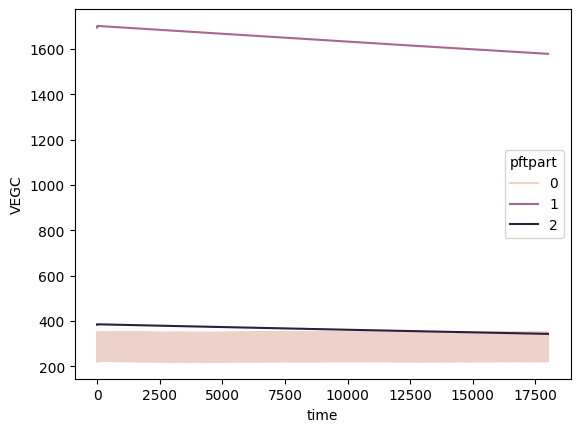

In [15]:
sns.lineplot(data = vegc_bs_eq.loc[vegc_bs_eq['pft']==0], x='time', y='VEGC', hue='pftpart')

## Compare vegetation carbon stocks

In [16]:
vegc_bs_eq_tem = vegc_bs_eq.loc[vegc_bs_eq['time']==11994]
vegc_bs_eq_tem['type'] = 'Modeled (TEM)'

vegc_bs_tr_field = vegc_bs_eq_tem.copy()
vegc_bs_tr_field['type'] = 'Field Obs.'
vegc_bs_tr_field['VEGC'] = [287.19, 173.92, 55.25, 1921.0, 299.33,
                            1694.1, 217.67, 123.0, 0.0, 0.0,
                            383.38, 30.54, 44.56, 0.0, 0.0]

vegc_bs_tr_rs = vegc_bs_eq_tem.copy()
vegc_bs_tr_rs['type'] = 'Remotely Sensed'
vegc_bs_tr_rs['VEGC'] = [337.38, np.nan, np.nan, np.nan, np.nan,
                            1990.0, np.nan, np.nan, np.nan, np.nan,
                            450.44, np.nan, np.nan, np.nan, np.nan]

/tmp/ipykernel_6433/4200167083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_bs_eq_tem['type'] = 'Modeled (TEM)'


In [17]:
vegc_bs_comp=pd.concat([vegc_bs_eq_tem, vegc_bs_tr_field, vegc_bs_tr_rs]).groupby(by=['pft', 'type']).sum().reset_index()

In [18]:
vegc_br_eq_tem = vegc_br_eq.loc[vegc_br_eq['time']==11995]
vegc_br_eq_tem['type'] = 'Modeled (TEM)'

vegc_br_tr_field = vegc_br_eq_tem.copy()
vegc_br_tr_field['type'] = 'Field Obs.'
vegc_br_tr_field['VEGC'] = [1.06,         103.00,       85.13,      158.31,   27.0,
                            5.09,         112.00,       2131.64,     0.0,      123.0,
                            0.43,         28.00,        289.71,     0.0,      20.0]

vegc_br_tr_rs = vegc_br_eq_tem.copy()
vegc_br_tr_rs['type'] = 'Remotely Sensed'
vegc_br_tr_rs['VEGC'] = [np.nan, np.nan, 62.14, np.nan, np.nan,
                            np.nan, np.nan, 2580.17, np.nan, np.nan,
                            np.nan, np.nan, 345.38, np.nan, np.nan]

/tmp/ipykernel_6433/2335290679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegc_br_eq_tem['type'] = 'Modeled (TEM)'


In [19]:
vegc_br_comp=pd.concat([vegc_br_eq_tem, vegc_br_tr_field, vegc_br_tr_rs]).groupby(by=['pft', 'type']).sum().reset_index()
vegc_br_comp['order'] = [4, 4, 4, 1, 1, 1, 0, 0, 0, 3, 3, 3, 2, 2, 2]
vegc_br_comp = vegc_br_comp.sort_values(by='order')

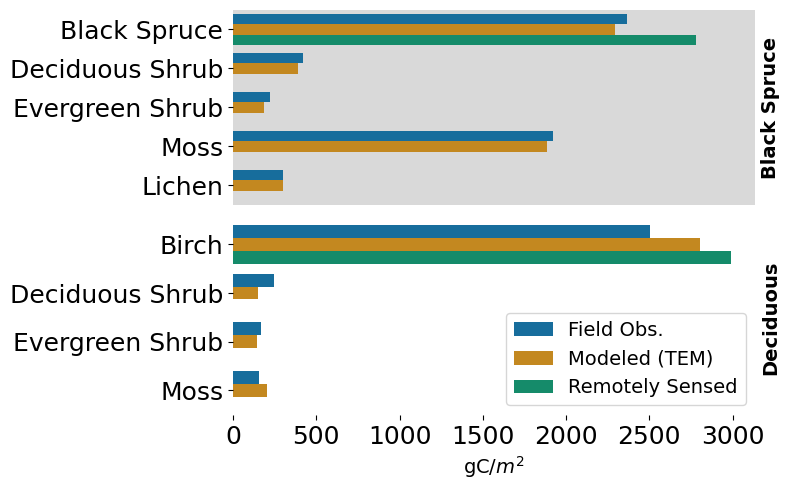

In [20]:
#TODO: propagate Error
fig, axes = plt.subplots(2, 1, figsize = (8,5), sharex=True)
sns.barplot(data = vegc_bs_comp, x='VEGC', y='pft', hue='type', orient='h', ax=axes[0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[0].set_facecolor('#d9d9d9')
axes[0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
axes[0].set_ylabel('Black Spruce', fontweight='bold', fontsize=14)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks_position('none')
axes[0].yaxis.set_label_position('right')
axes[0].get_legend().remove()

#TODO: propagate Error
sns.barplot(data = vegc_br_comp.loc[vegc_br_comp['pft']!=0], x='VEGC', y='order', hue='type', orient='h', ax=axes[1], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[1].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
plt.xticks(fontsize= 18)
axes[1].set_ylabel('Deciduous', fontweight='bold', fontsize=14)
axes[1].yaxis.set_label_position('right')
axes[1].set_xlabel('gC/$m^2$', fontsize=14)
axes[1].legend(title='', fontsize=14)

fig.tight_layout()
plt.savefig('output_figs/BONA/equillibrium_vegC.jpg', dpi=300)



In [21]:
vegc_br_comp

,pft,type,time,pftpart,y,x,VEGC,order
6,2,Field Obs.,35985,3,0,0,2506.480000,0
7,2,Modeled (TEM),35985,3,0,0,2806.430542,0
8,2,Remotely Sensed,35985,3,0,0,2987.690000,0
3,1,Field Obs.,35985,3,0,0,243.000000,1
4,1,Modeled (TEM),35985,3,0,0,149.215031,1
5,1,Remotely Sensed,35985,3,0,0,0.000000,1
12,4,Field Obs.,35985,3,0,0,170.000000,2
13,4,Modeled (TEM),35985,3,0,0,144.790233,2
14,4,Remotely Sensed,35985,3,0,0,0.000000,2
9,3,Field Obs.,35985,3,0,0,158.310000,3


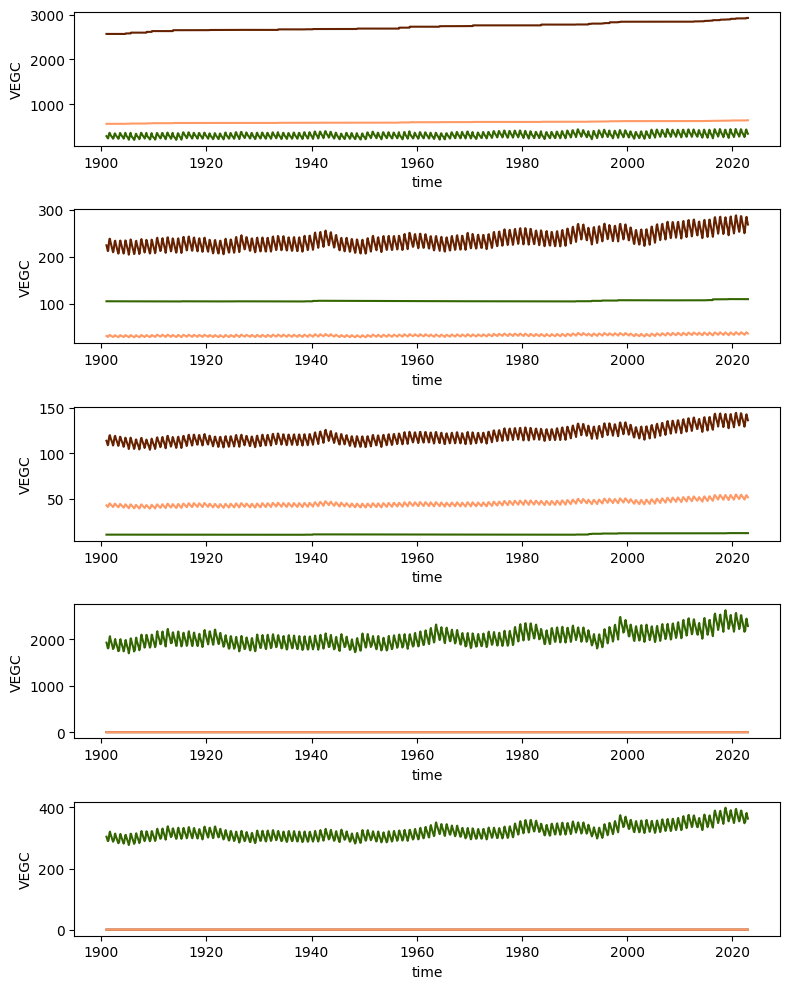

In [22]:
fig, axes = plt.subplots(5,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==0], x='time', y='VEGC', hue='pftpart', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[(vegc_bs_tr['pft']==1)], x='time', y='VEGC', hue='pftpart', ax=axes[1], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==2], x='time', y='VEGC', hue='pftpart', ax=axes[2], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==3], x='time', y='VEGC', hue='pftpart', ax=axes[3], legend=False, palette=palette)
sns.lineplot(data=vegc_bs_tr.loc[vegc_bs_tr['pft']==4], x='time', y='VEGC', hue='pftpart', ax=axes[4], legend=False, palette=palette)
fig.tight_layout()

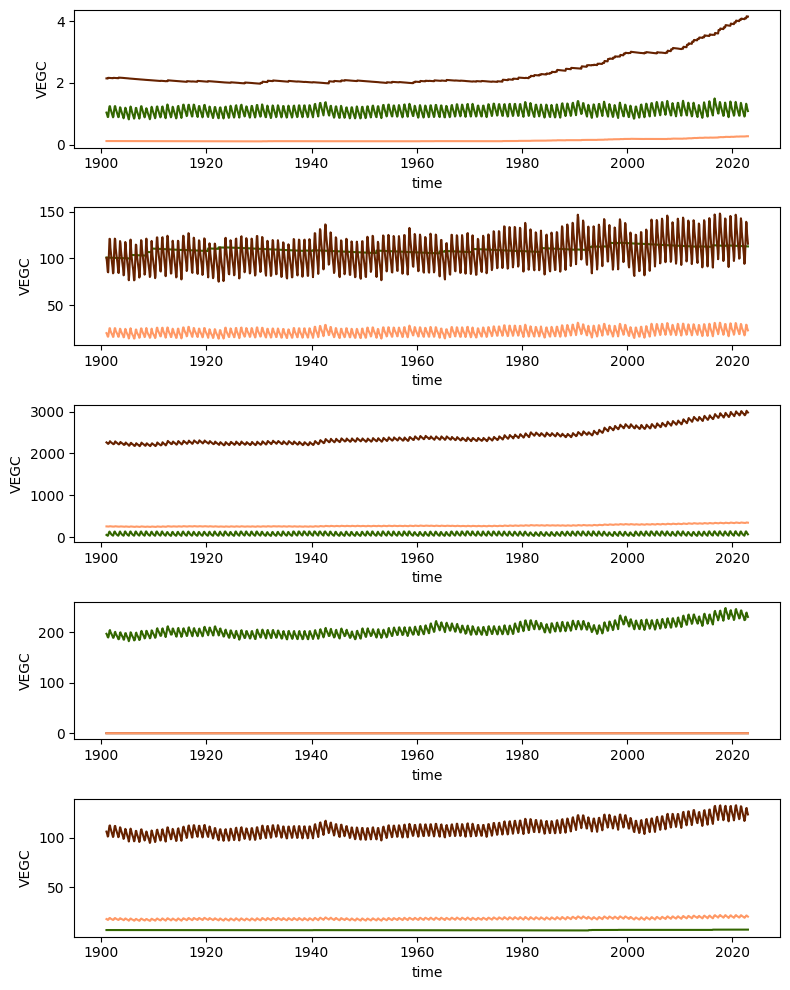

In [23]:
fig, axes = plt.subplots(5,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==0], x='time', y='VEGC', hue='pftpart', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[(vegc_br_tr['pft']==1)], x='time', y='VEGC', hue='pftpart', ax=axes[1], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==2], x='time', y='VEGC', hue='pftpart', ax=axes[2], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==3], x='time', y='VEGC', hue='pftpart', ax=axes[3], legend=False, palette=palette)
sns.lineplot(data=vegc_br_tr.loc[vegc_br_tr['pft']==4], x='time', y='VEGC', hue='pftpart', ax=axes[4], legend=False, palette=palette)
fig.tight_layout()

/tmp/ipykernel_6433/272166968.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_bs_tr, x='date', y='BURN', ax=axes[0], legend=False, palette=palette)
/tmp/ipykernel_6433/272166968.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_br_tr, x='date', y='BURN', ax=axes[1], legend=False, palette=palette)


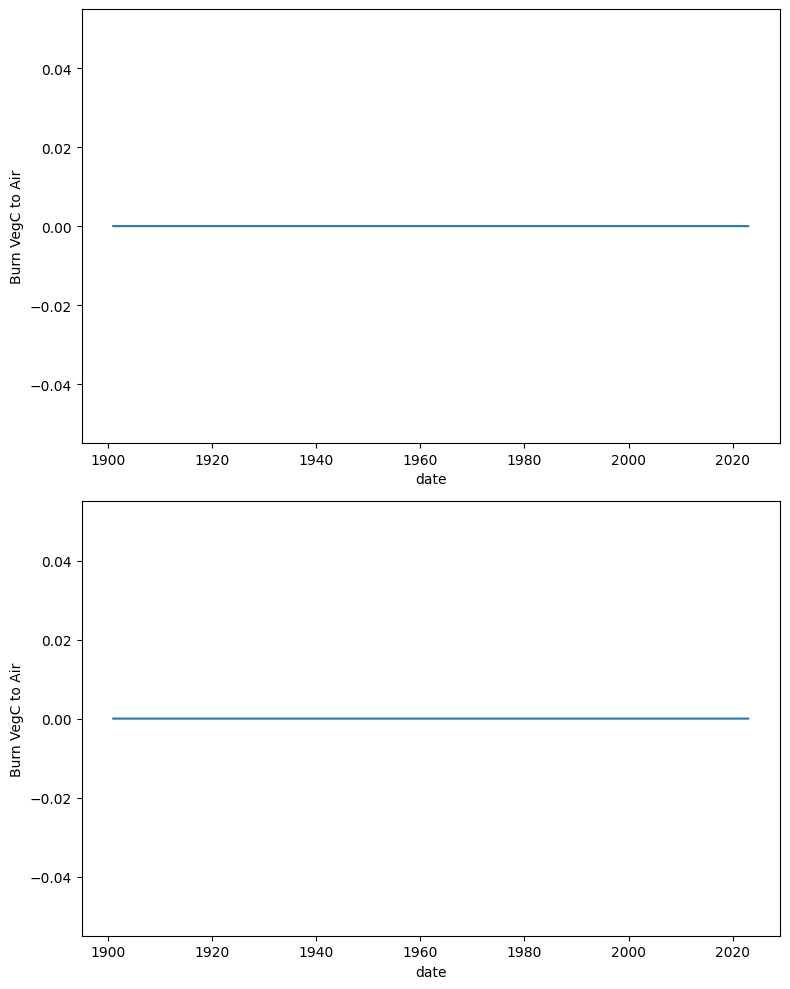

In [24]:
fig, axes = plt.subplots(2,1, figsize=(8,10))
palette=sns.color_palette(['#336600', '#662200', '#ff9966'])
sns.lineplot(data=df_bs_tr, x='date', y='BURN', ax=axes[0], legend=False, palette=palette)
sns.lineplot(data=df_br_tr, x='date', y='BURN', ax=axes[1], legend=False, palette=palette)

axes[0].set_ylabel('Burn VegC to Air')
axes[1].set_ylabel('Burn VegC to Air')

fig.tight_layout()

## Compare soil carbon stocks

In [25]:
shlwc_bs_eq

,time,y,x,SHLWC
0,0,0,0,2805.064013
1,1,0,0,2846.855202
2,2,0,0,2889.376514
3,3,0,0,2930.602707
4,4,0,0,2958.405504
...,...,...,...,...
17995,17995,0,0,3010.124342
17996,17996,0,0,2980.110596
17997,17997,0,0,3024.094837
17998,17998,0,0,3066.885292


<AxesSubplot:xlabel='time', ylabel='DEEPC'>

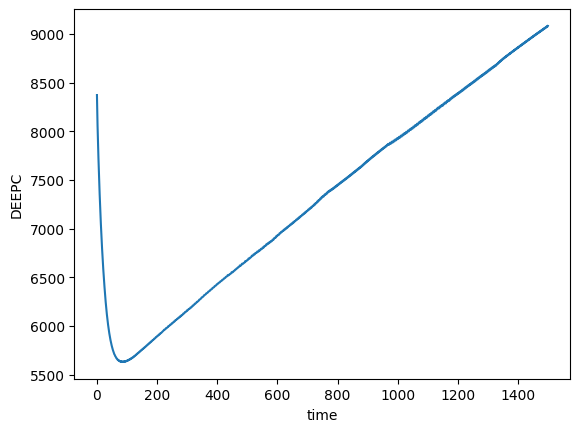

In [26]:
sns.lineplot(data=deepc_bs_eq, x='time', y='DEEPC')

<AxesSubplot:xlabel='time', ylabel='MINEC'>

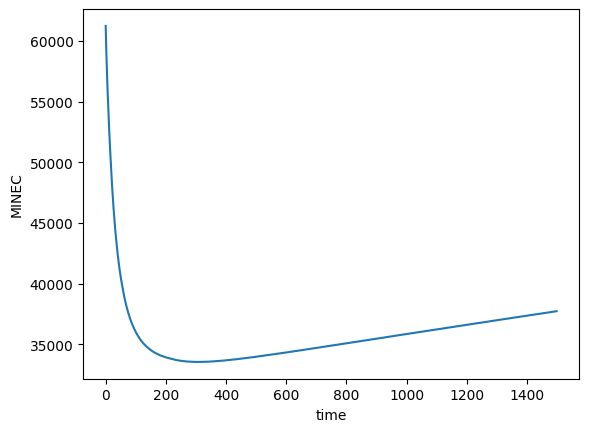

In [27]:
sns.lineplot(data=minec_bs_eq, x='time', y='MINEC')

<AxesSubplot:xlabel='time', ylabel='ALD'>

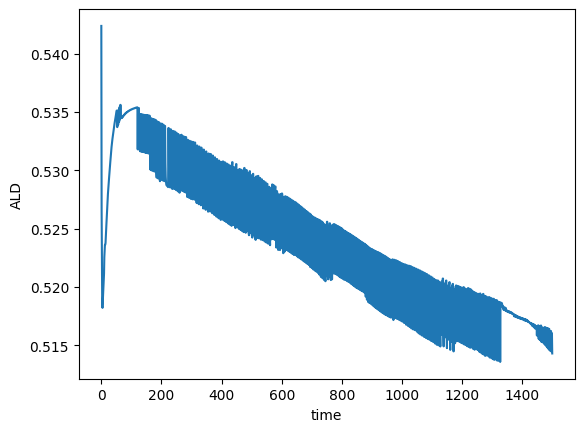

In [28]:
sns.lineplot(data=ald_bs_eq, x='time', y='ALD')

<AxesSubplot:xlabel='year', ylabel='ALD'>

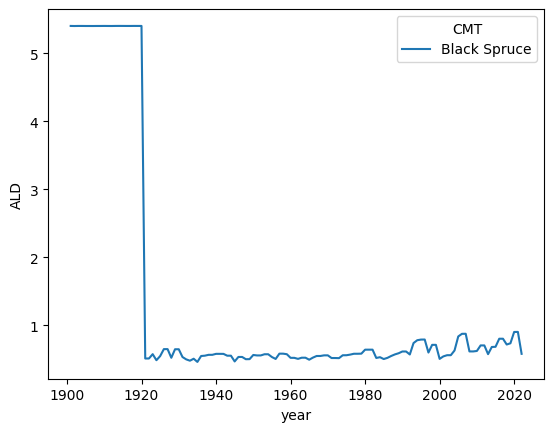

In [29]:
sns.lineplot(data=df_yearly.loc[df_yearly['CMT']=='Black Spruce'], x='year', y='ALD', hue='CMT')

In [30]:
ald_bs_tr

<xarray.Variable (time: 122)>
array([5.4051944 , 5.4040028 , 5.40496102, 5.40495072, 5.40441848,
       5.40435067, 5.40410368, 5.40463293, 5.40466173, 5.40512972,
       5.40461175, 5.40432353, 5.40511184, 5.40540218, 5.40520845,
       5.40483777, 5.40482237, 5.40532109, 5.4050834 , 5.4050834 ,
       0.51010092, 0.51010092, 0.57362031, 0.4846739 , 0.54490427,
       0.64801849, 0.64801849, 0.52084481, 0.64608243, 0.64608284,
       0.53172395, 0.49693275, 0.47759128, 0.50663924, 0.45960935,
       0.5467766 , 0.55143856, 0.56403505, 0.56403505, 0.57837192,
       0.57837192, 0.57795371, 0.55131802, 0.55131802, 0.46690873,
       0.53271549, 0.53271549, 0.49961379, 0.50058087, 0.56181484,
       0.55508331, 0.55508331, 0.57242896, 0.57251986, 0.53133515,
       0.50337281, 0.58119848, 0.58119848, 0.57313545, 0.51968033,
       0.51968033, 0.50464112, 0.52166848, 0.52166848, 0.49227171,
       0.5230916 , 0.5469517 , 0.54706679, 0.55636113, 0.55636113,
       0.51695978, 0.51695978, 0.5152314 , 0.55754784, 0.55810836,
       0.56726725, 0.5797892 , 0.5797892 , 0.58131452, 0.63985749,
       0.64008401, 0.64008401, 0.5179525 , 0.52908459, 0.5020129 ,
       0.51941986, 0.54697236, 0.570206  , 0.58741346, 0.61310543,
       0.61310543, 0.56921626, 0.73725041, 0.77915661, 0.78855271,
       0.78920736, 0.59767171, 0.71092223, 0.71092223, 0.50446026,
       0.54097222, 0.55851713, 0.55851713, 0.62789804, 0.83450505,
       0.87330815, 0.87378145, 0.6141226 , 0.61402028, 0.62079536,
       0.7024746 , 0.7024746 , 0.57398972, 0.67944281, 0.68227859,
       0.80096228, 0.80096228, 0.71584388, 0.73382916, 0.90055835,
       0.90133262, 0.57871603])
Attributes:
    units:      m
    long_name:  Soil active layer depth

In [31]:
shlwc_bs_modeled = shlwc_bs_eq.loc[shlwc_bs_eq['time']==999]['SHLWC'].values[0]
deepc_bs_modeled = deepc_bs_eq.loc[deepc_bs_eq['time']==999]['DEEPC'].values[0]
shlwc_br_modeled = shlwc_br_eq.loc[shlwc_br_eq['time']==999]['SHLWC'].values[0]
deepc_br_modeled = deepc_br_eq.loc[deepc_br_eq['time']==999]['DEEPC'].values[0]

shlwc_bs_field = 2768
deepc_bs_field = 8765
shlwc_br_field = 728
deepc_br_field = 2307

In [32]:
df_org_c = pd.DataFrame({'stand': ['Black Spruce', 'Black Spruce', 'Deciduous', 'Deciduous',
                                   'Black Spruce', 'Black Spruce', 'Deciduous', 'Deciduous'],
                         'carbon_stock': ['Fibric', 'Humic', 'Fibric', 'Humic',
                                          'Fibric', 'Humic', 'Fibric', 'Humic'], 
                         'value': [shlwc_bs_field, deepc_bs_field, shlwc_br_field, deepc_br_field,
                                   shlwc_bs_modeled, deepc_bs_modeled, shlwc_br_modeled, deepc_br_modeled], 
                         'type': ['Field Obs.', 'Field Obs.', 'Field Obs.', 'Field Obs.',
                                  'Modeled (TEM)', 'Modeled (TEM)', 'Modeled (TEM)', 'Modeled (TEM)']})

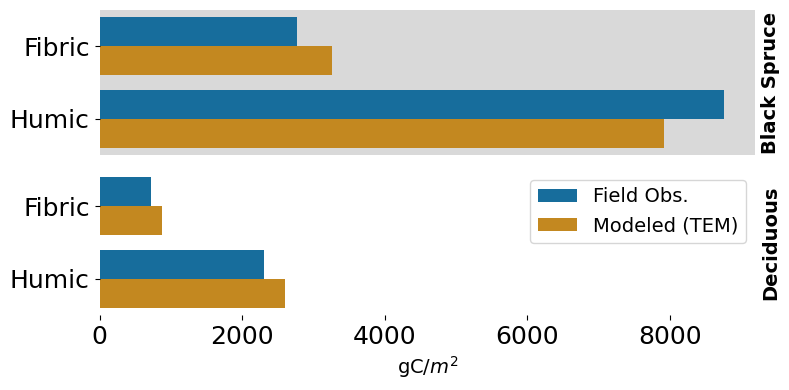

In [33]:
fig, axes = plt.subplots(2, 1, figsize = (8,4), sharex=True)

sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Black Spruce'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[0])
sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Deciduous'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[1])

axes[0].set_facecolor('#d9d9d9')
axes[0].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[0].set_xlabel('')
axes[0].xaxis.set_ticks_position('none')
axes[0].set_ylabel('Black Spruce', fontweight='bold', fontsize=14)
axes[0].yaxis.set_label_position('right')
axes[0].get_legend().remove()

axes[1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[1].set_ylabel('Deciduous', fontweight='bold', fontsize=14)
axes[1].yaxis.set_label_position('right')
plt.xticks(fontsize= 18)
axes[1].set_xlabel('gC/$m^2$', fontsize=14)
plt.legend(title='', fontsize=14)
sns.despine(left=True, bottom=True)
fig.tight_layout()
plt.savefig('output_figs/BONA/equillibrium_soilC.jpg', dpi=300)

# Combined soil

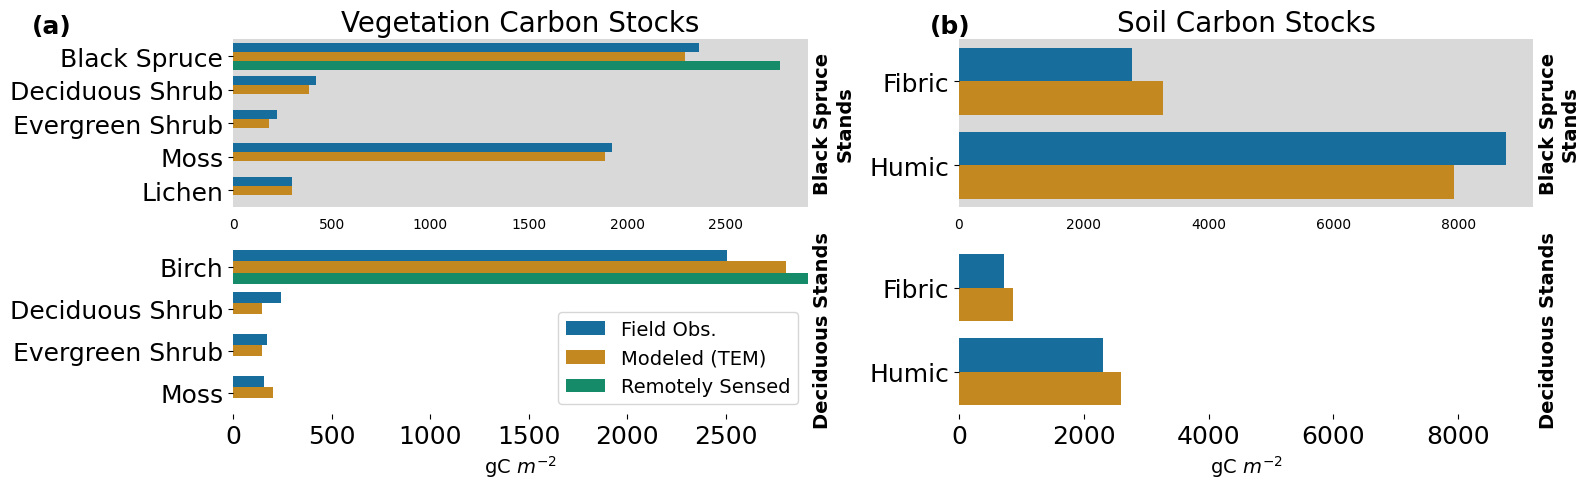

In [34]:
#TODO: propagate Error
fig, axes = plt.subplots(2, 2, figsize = (16,5))
sns.barplot(data = vegc_bs_comp, x='VEGC', y='pft', hue='type', orient='h', ax=axes[0,0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[0,0].set_facecolor('#d9d9d9')
axes[0,0].set_yticklabels(('Black Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen'), fontsize=18)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,0].xaxis.set_ticks_position('none')
axes[0,0].set_ylabel('Black Spruce\nStands', fontweight='bold', fontsize=14)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].get_legend().remove()
axes[0,0].set_title('Vegetation Carbon Stocks', fontsize=20)
axes[0,0].text(-.35, 1.15, '(a)', horizontalalignment='left', verticalalignment='top', transform=axes[0,0].transAxes, fontsize=18, fontweight='bold')

#TODO: propagate Error
sns.barplot(data = vegc_br_comp.loc[vegc_br_comp['pft']!=0], x='VEGC', y='order', hue='type', orient='h', ax=axes[1,0], palette='colorblind')
sns.despine(left=True, bottom=True)

axes[1,0].set_yticklabels(('Birch', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss'), fontsize=18)
axes[1,0].tick_params(axis='x', labelsize=18)
axes[1,0].set_ylabel('Deciduous Stands', fontweight='bold', fontsize=14)
axes[1,0].yaxis.set_label_position('right')
axes[1,0].set_xlabel('gC $m^{-2}$', fontsize=14)
axes[1,0].legend(title='', fontsize=14)
axes[1,0].sharex(axes[0,0])



sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Black Spruce'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[0,1])
sns.barplot(data = df_org_c.loc[df_org_c['stand']=='Deciduous'], x='value', y='carbon_stock', hue='type', orient='h', palette='colorblind', ax=axes[1,1])

axes[0,1].set_title('Soil Carbon Stocks', fontsize=20)
axes[0,1].set_facecolor('#d9d9d9')
axes[0,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[0,1].set_xlabel('')
axes[0,1].xaxis.set_ticks_position('none')
axes[0,1].set_ylabel('Black Spruce\nStands', fontweight='bold', fontsize=14)
axes[0,1].yaxis.set_label_position('right')
axes[0,1].get_legend().remove()
axes[0,1].text(-.05, 1.15, '(b)', horizontalalignment='left', verticalalignment='top', transform=axes[0,1].transAxes, fontsize=18, fontweight='bold')

axes[1,1].set_yticklabels(('Fibric', 'Humic'), fontsize=18)
axes[1,1].set_ylabel('Deciduous Stands', fontweight='bold', fontsize=14)
axes[1,1].yaxis.set_label_position('right')
axes[1,1].tick_params(axis='x', labelsize=18)
axes[1,1].set_xlabel('gC $m^{-2}$', fontsize=14)
axes[1,1].get_legend().remove()
sns.despine(left=True, bottom=True)
axes[1,1].sharex(axes[0,1])

fig.tight_layout()
plt.savefig('output_figs/BONA/C_stocks_combined.jpg', dpi=300)


# Fluxes

In [35]:
BONA_EC_monthly = pd.read_csv('/data/comparison_data/BONA_monthly_fluxes.csv', parse_dates=['MM_YY'])


In [36]:
decid_color = '#6CB36B'
ever_color = '#1F6B39'

In [37]:
df_br

,date,GPP,NPP,RG,RG_root,RH,RM,RM_root,LWC_top,TLAYER_top,EET,TRANSPIRATION,LAI,BURN,RECO,NEE,year
0,1901-01-01,0.000000,-0.549609,0.000000,0.000000,3.467446,0.549609,0.067750,0.000000,-11.544840,0.469262,0.000000,7.966432,0.0,4.017055,4.017055,1901
1,1901-02-01,0.000000,-1.009700,0.000000,0.000000,4.167504,1.009700,0.122805,0.000000,-11.698669,0.485081,0.000000,7.734816,0.0,5.177204,5.177204,1901
2,1901-03-01,0.000000,-4.963639,0.000000,0.000000,5.137020,4.963639,0.594135,0.000000,-9.953400,2.530057,0.000000,7.533060,0.0,10.100659,10.100659,1901
3,1901-04-01,0.000000,-12.906176,0.000000,0.000000,6.506946,12.906176,1.509686,0.000000,-7.482137,20.611305,0.000000,7.346228,0.0,19.413122,19.413122,1901
4,1901-05-01,62.907657,29.758941,3.273484,0.100447,11.280114,29.875234,3.198346,0.120181,-0.060639,24.947691,0.630370,7.158477,0.0,44.428831,-18.478826,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2022-08-31,183.294028,113.025012,12.432751,1.220111,0.012615,57.836271,6.007581,0.238491,7.632523,38.942594,23.543265,10.351048,0.0,70.281637,-113.012391,2022
1460,2022-10-01,111.705460,58.515269,6.436680,0.766362,19.305528,46.753511,5.258719,0.265301,4.395916,19.244870,9.437864,10.536972,0.0,72.495719,-39.209740,2022
1461,2022-10-31,0.000000,-23.239754,0.000000,0.000000,15.270644,23.239754,2.980066,0.202174,-0.232019,1.506913,0.754897,10.159431,0.0,38.510398,38.510398,2022
1462,2022-12-01,0.000000,-6.154331,0.000000,0.000000,7.115685,6.154331,0.768772,0.000000,-3.628206,0.664555,0.000000,9.706509,0.0,13.270015,13.270015,2022


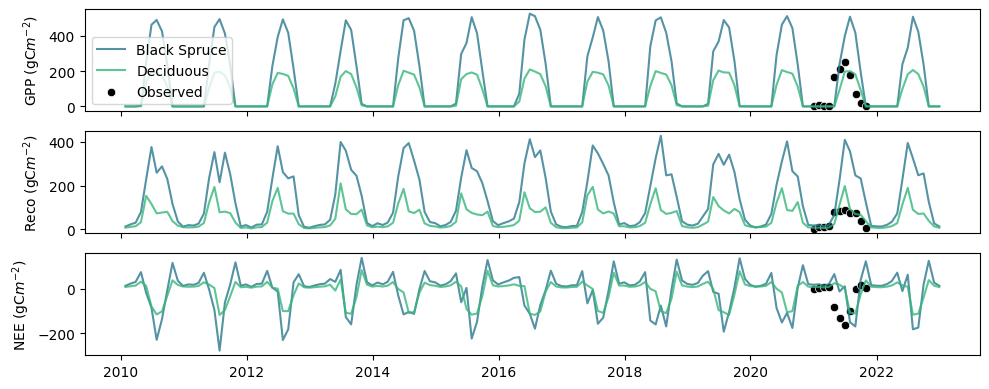

In [38]:
fig, axes=plt.subplots(3,1,figsize=(10,4), sharex=True)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='GPP', label = 'Black Spruce', ax=axes[0], alpha=0.8, color='#2A788EFF')
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='RECO', label = 'Black Spruce', ax=axes[1], legend=False, alpha=0.8, color='#2A788EFF')
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2023-01-01')], x='date', y='NEE', label = 'Black Spruce', ax=axes[2], legend=False, alpha=0.8, color='#2A788EFF')

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='GPP', label = 'Deciduous', ax=axes[0], alpha=0.8, color='#35B779FF')
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='RECO', label = 'Deciduous', ax=axes[1], legend=False, alpha=0.8, color='#35B779FF')
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2023-01-01')], x='date', y='NEE', label = 'Deciduous', ax=axes[2], legend=False, alpha=0.8, color='#35B779FF')

sns.scatterplot(data=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021], x='MM_YY', y='GPP_gCm-2', ax=axes[0], label='Observed', color='black')
sns.scatterplot( x=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021,'MM_YY'], y=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021, 'GPP_gCm-2'] + BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021, 'NEE_gCm-2'], ax=axes[1], legend=False, color='black')
sns.scatterplot(data=BONA_EC_monthly.loc[BONA_EC_monthly['YR']==2021], x='MM_YY', y='NEE_gCm-2', ax=axes[2], legend=False, color='black')
plt.xlabel('')

axes[0].set_ylabel('GPP (gC$m^{-2}$)')
axes[1].set_ylabel('Reco (gC$m^{-2}$)')
axes[2].set_ylabel('NEE (gC$m^{-2}$)')
fig.tight_layout()
plt.savefig('output_figs/BONA/flux_hist.jpg', dpi=300)

In [39]:
BONA_soil_flux = pd.read_csv('/data/comparison_data/BONA_daily_averaged_soil_flux.csv', parse_dates=['MM_YY', 'Date'])

In [40]:
BONA_soil_flux.head()

,Unnamed: 0,Date,stand,Flux (gC m2 s-1),Flux (gC m2 m-1),month,year,MM_YY
0,0,2021-05-21,black_spruce,0.000025,66.273065,5,2021,2021-05-01
1,1,2021-05-21,deciduous,0.000028,74.698665,5,2021,2021-05-01
2,2,2021-05-21,mixed,0.000015,40.095081,5,2021,2021-05-01
3,3,2021-05-27,black_spruce,0.000021,55.853433,5,2021,2021-05-01
4,4,2021-05-27,deciduous,0.000019,50.025484,5,2021,2021-05-01


<AxesSubplot:xlabel='date', ylabel='Flux (gC m2 m-1)'>

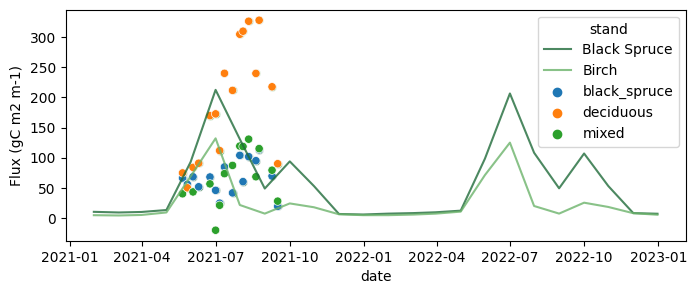

In [41]:
fig, axes=plt.subplots(figsize=(8,3))
bs_soil_resp = df_bs.loc[(df_bs['date']>'2021-01-01') & (df_bs['date']<'2023-01-01')]
br_soil_resp = df_br.loc[(df_br['date']>'2021-01-01') & (df_br['date']<'2023-01-01')]
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH']+bs_soil_resp['RM_root']+bs_soil_resp['RG_root'], label = 'Black Spruce', legend=False, alpha=0.8, color=ever_color)
sns.lineplot(data=br_soil_resp, x='date', y=br_soil_resp['RH']+br_soil_resp['RM_root']+br_soil_resp['RG_root'], label = 'Birch', legend=False, alpha=0.8, color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='black_spruce')], x='Date', y='Flux (gC m2 m-1)', color=ever_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='deciduous')], x='Date', y='Flux (gC m2 m-1)', color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[BONA_soil_flux['year']==2021], x='Date', y='Flux (gC m2 m-1)', hue='stand')

<AxesSubplot:xlabel='date', ylabel='RH'>

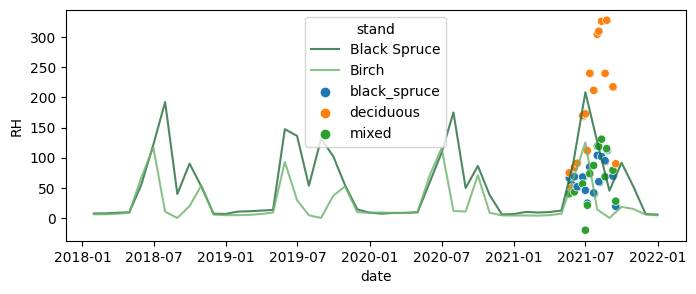

In [42]:
fig, axes=plt.subplots(figsize=(8,3))
bs_soil_resp = df_bs.loc[(df_bs['date']>'2018-01-01') & (df_bs['date']<'2022-01-01')]
br_soil_resp = df_br.loc[(df_br['date']>'2018-01-01') & (df_br['date']<'2022-01-01')]
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'Black Spruce', legend=False, alpha=0.8, color=ever_color)
sns.lineplot(data=br_soil_resp, x='date', y=br_soil_resp['RH'], label = 'Birch', legend=False, alpha=0.8, color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='black_spruce')], x='Date', y='Flux (gC m2 m-1)', color=ever_color)
sns.scatterplot(data=BONA_soil_flux.loc[(BONA_soil_flux['year']==2021) & (BONA_soil_flux['stand']=='deciduous')], x='Date', y='Flux (gC m2 m-1)', color=decid_color)
sns.scatterplot(data=BONA_soil_flux.loc[BONA_soil_flux['year']==2021], x='Date', y='Flux (gC m2 m-1)', hue='stand')

In [43]:
rh_br_tr_layer

<xarray.Variable (time: 1464, layer: 22)>
array([[0.        , 2.56404735, 0.09011032, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.28510901, 0.0908238 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 4.16477652, 0.10296331, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 6.27590068, 0.24361748, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 5.20616191, 0.20226795, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.84491099, 0.13778768, ..., 0.        , 0.        ,
        0.        ]])
Attributes:
    units:      g/m2/month
    long_name:  Heterotrophic respiration

<AxesSubplot:xlabel='date', ylabel='TLAYER_top'>

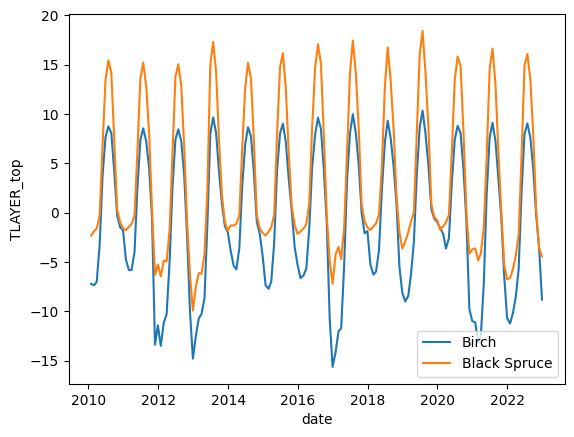

In [44]:
fig, ax = plt.subplots()

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='TLAYER_top', label = 'Birch', ax=ax)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='date', y='TLAYER_top', label = 'Black Spruce', ax=ax)


<AxesSubplot:xlabel='date', ylabel='LWC_top'>

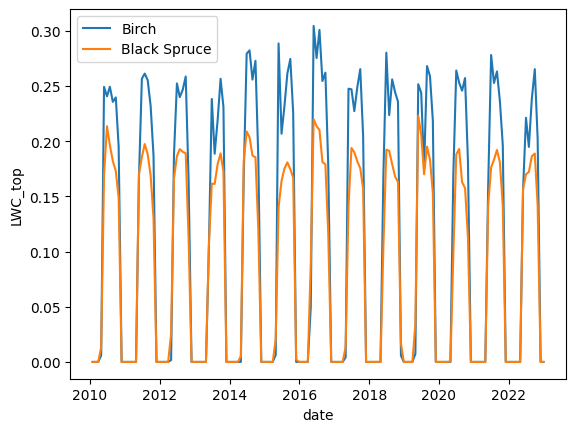

In [45]:
fig, ax = plt.subplots()

sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='LWC_top', label = 'Birch', ax=ax)
sns.lineplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='date', y='LWC_top', label = 'Black Spruce', ax=ax)


In [46]:
tlayer_bs_tr_df = pd.DataFrame(tlayer_bs_tr)
lwclayer_bs_tr_df = pd.DataFrame(lwclayer_bs_tr)

<AxesSubplot:ylabel='1'>

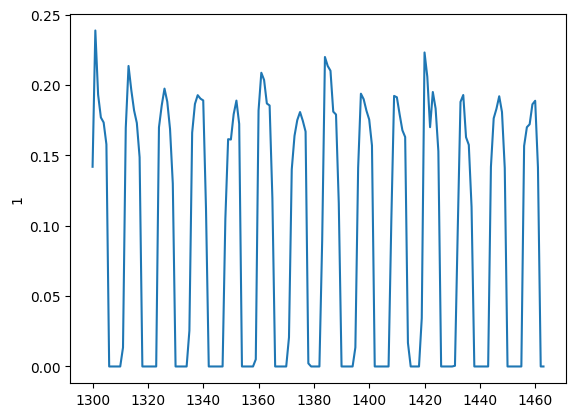

In [47]:
sns.lineplot(x=lwclayer_bs_tr_df[1300:].index, y=lwclayer_bs_tr_df[1300:][1])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][1])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][2])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][3])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][4])
#sns.lineplot(x=lwclayer_bs_tr_df[1200:].index, y=lwclayer_bs_tr_df[1200:][5])

<AxesSubplot:ylabel='0'>

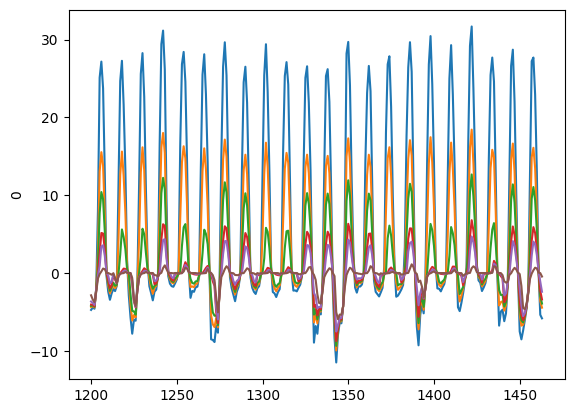

In [48]:

sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][0])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][1])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][2])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][3])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][4])
sns.lineplot(x=tlayer_bs_tr_df[1200:].index, y=tlayer_bs_tr_df[1200:][5])

In [49]:
bs_soil_resp

,date,GPP,NPP,RG,RG_root,RH,RM,RM_root,LWC_top,TLAYER_top,EET,TRANSPIRATION,LAI,BURN,RECO,NEE,year
1404,2018-01-30,0.000000,-7.092997,0.000000,0.000000,7.446837,7.092997,0.116711,0.000000,-1.767055,3.684334,0.000000,84.451326,0.0,14.539834,14.539834,2018
1405,2018-03-02,0.000000,-10.000792,0.000000,0.000000,7.681037,10.000792,0.166210,0.000000,-1.396035,0.672953,0.000000,83.085891,0.0,17.681829,17.681829,2018
1406,2018-03-30,0.000000,-23.968349,0.000000,0.000000,8.639220,23.968349,0.402906,0.000000,-1.095563,6.075647,0.000000,81.686033,0.0,32.607569,32.607569,2018
1407,2018-04-30,0.000000,-64.990194,0.000000,0.000000,9.336301,64.990194,1.110323,0.000000,-0.217472,21.540147,2.981871,80.039618,0.0,74.326495,74.326495,2018
1408,2018-05-30,340.785505,198.106082,21.791669,0.267401,54.222512,120.887760,2.187206,0.103983,4.671614,34.858135,25.391396,77.618594,0.0,196.901940,-143.883565,2018
1409,2018-06-30,486.893104,282.727574,31.100037,0.479307,121.400919,173.065472,3.281593,0.192272,12.729837,60.024404,40.724800,81.032354,0.0,325.566427,-161.326677,2018
1410,2018-07-30,504.737396,268.812094,29.569331,0.419137,192.307117,206.356001,3.909168,0.191308,16.761877,77.088843,60.667072,85.579726,0.0,428.232449,-76.504947,2018
1411,2018-08-30,417.479927,210.163346,23.117970,0.368931,39.653200,184.198624,3.292501,0.179151,13.417893,52.782602,30.922699,89.761798,0.0,246.969794,-170.510133,2018
1412,2018-09-30,255.846950,94.424443,10.386689,0.245060,90.239364,151.035837,2.497664,0.167848,8.474090,26.535316,15.316509,92.730194,0.0,251.661890,-4.185060,2018
1413,2018-10-30,17.101540,-78.999177,0.356350,0.056477,52.080631,95.744365,1.486990,0.163073,1.680980,6.929304,2.516439,93.414269,0.0,148.181347,131.079807,2018


<AxesSubplot:xlabel='date', ylabel='LWC_top'>

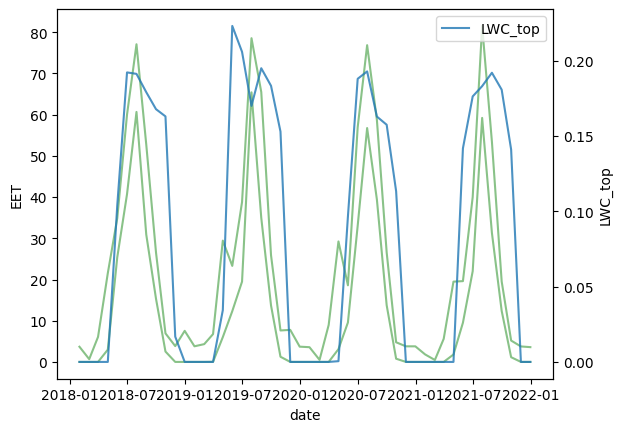

In [50]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['EET'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['TRANSPIRATION'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['LWC_top'], label = 'LWC_top', alpha=0.8, ax = ax2)

<AxesSubplot:xlabel='date', ylabel='LAI'>

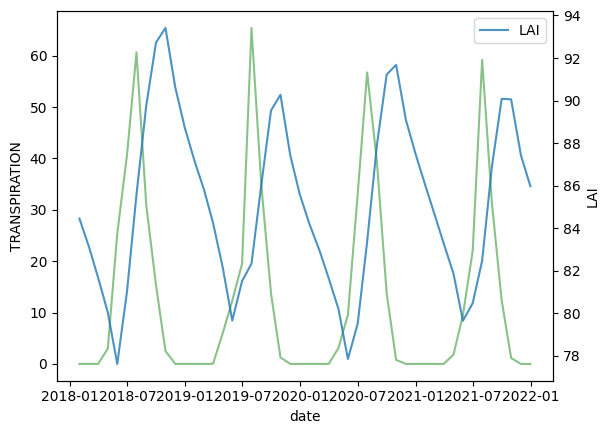

In [51]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['TRANSPIRATION'], label = 'Trans', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['LAI'], label = 'LAI', alpha=0.8, ax = ax2)

<AxesSubplot:xlabel='date', ylabel='LAI'>

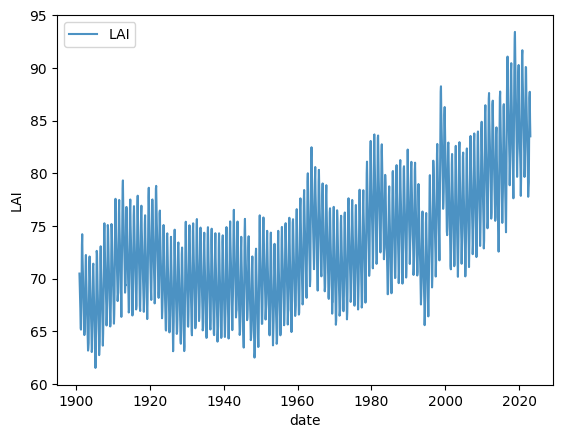

In [52]:
sns.lineplot(data=df_bs, x='date', y=df_bs['LAI'], label = 'LAI', alpha=0.8)

<AxesSubplot:>

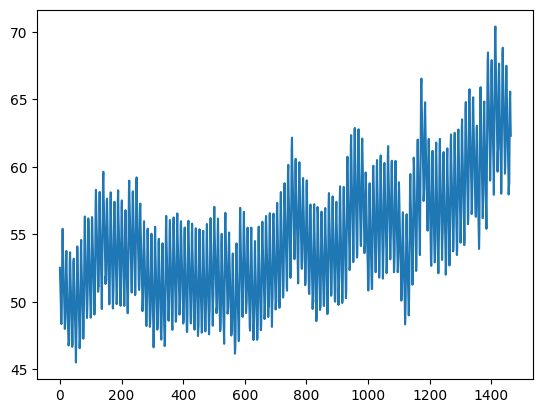

In [53]:
sns.lineplot(x=np.arange(len(lai_bs_tr)), y=lai_bs_tr[:,3])

(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.,
        18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

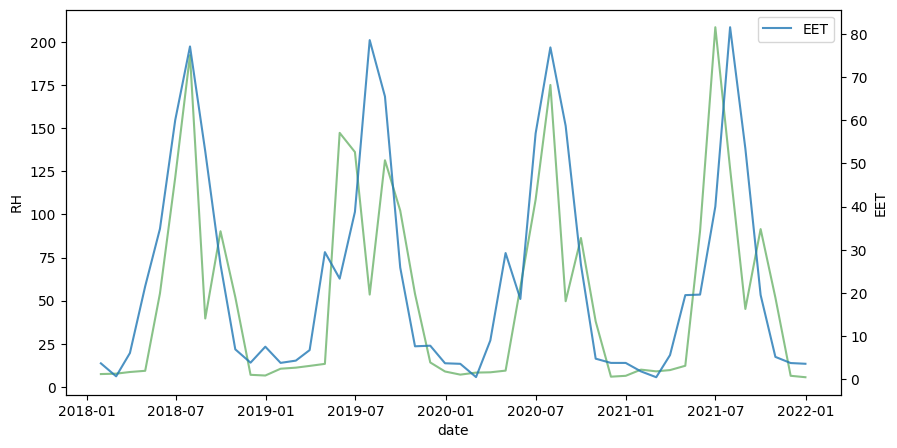

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['EET'], label = 'EET', alpha=0.8, ax = ax2)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='time', ylabel='LTRFALC'>

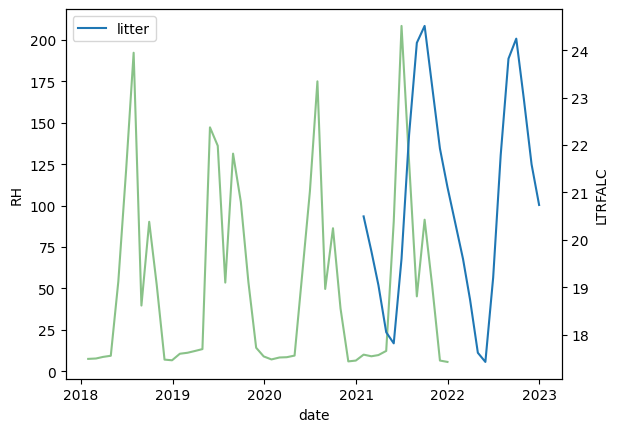

In [55]:

fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', legend=False, alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=ltrfalc_bs_tr.loc[ltrfalc_bs_tr['time']>'2021-01-01'], x='time', y='LTRFALC', ax=ax2, label='litter')

<AxesSubplot:xlabel='time', ylabel='SHLWC'>

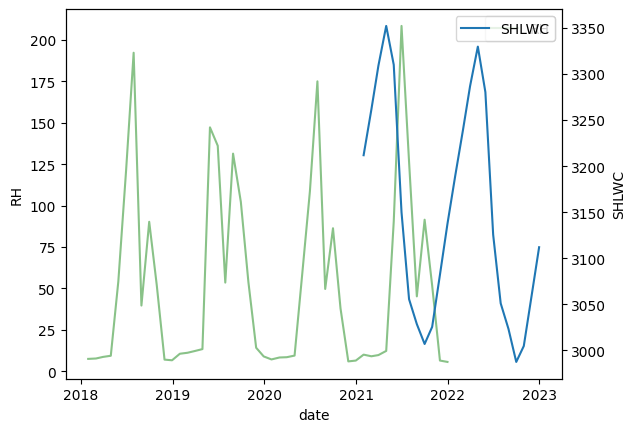

In [56]:
fig, ax = plt.subplots()
ax2=ax.twinx()
sns.lineplot(data=bs_soil_resp, x='date', y=bs_soil_resp['RH'], label = 'RH', alpha=0.8, color=decid_color, ax = ax)
sns.lineplot(data=shlwc_bs_tr.loc[shlwc_bs_tr['time']>'2021-01-01'], x='time', y='SHLWC', ax=ax2, label='SHLWC')

<AxesSubplot:xlabel='date', ylabel='RH'>

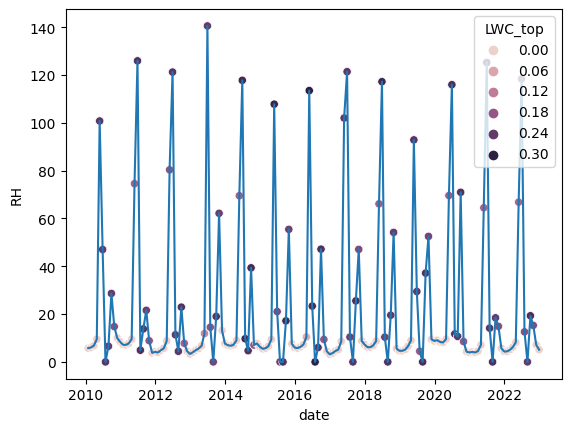

In [57]:
sns.lineplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='RH')
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='date', y='RH', hue = 'LWC_top')

<AxesSubplot:xlabel='LWC_top', ylabel='RH'>

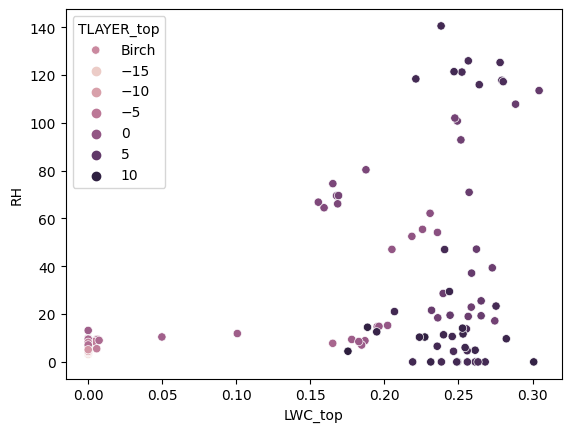

In [58]:
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='LWC_top', y='RH', label = 'Birch', hue='TLAYER_top')

<AxesSubplot:xlabel='TLAYER_top', ylabel='RH'>

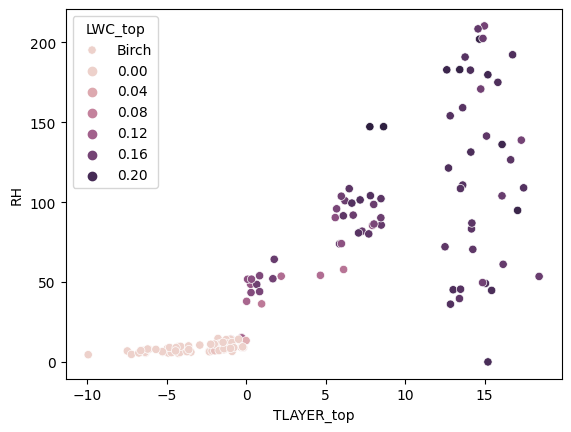

In [59]:
sns.scatterplot(data=df_bs.loc[(df_bs['date']>'2010-01-01') & (df_bs['date']<'2024-01-01')], x='TLAYER_top', y='RH', label = 'Birch', hue='LWC_top')

<AxesSubplot:xlabel='LWC_top', ylabel='RH'>

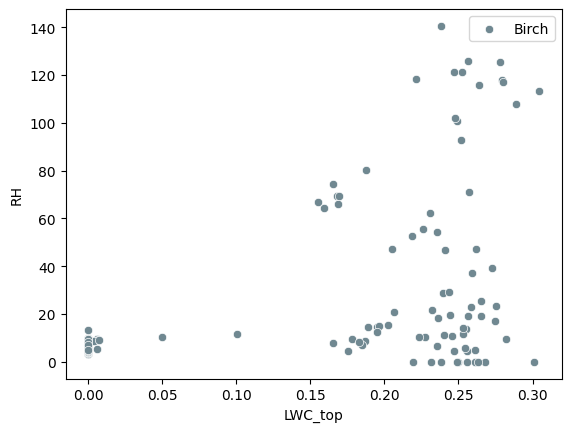

In [60]:
sns.scatterplot(data=df_br.loc[(df_br['date']>'2010-01-01') & (df_br['date']<'2024-01-01')], x='LWC_top', y='RH', label = 'Birch', color='#708891')

In [61]:
df_yearly_melt = df_yearly[['year', 'GPP', 'RECO', 'NEE', 'CMT']].melt(id_vars=['year', 'CMT'], value_vars=['GPP', 'RECO', 'NEE', 'CMT'])
df_yearly_melt.loc[df_yearly_melt['variable']=='RECO', 'variable'] = 'Reco'
df_yearly_melt['order'] = 0
df_yearly_melt.loc[df_yearly_melt['variable']=='Reco', 'order'] = 1
df_yearly_melt.loc[df_yearly_melt['variable']=='NEE', 'order'] = 2
df_yearly_melt = df_yearly_melt.sort_values(by='order')

In [62]:
df_yearly_melt.head()

,year,CMT,variable,value,order
0,1901,Black Spruce,GPP,1416.199672,0
155,1934,Deciduous,GPP,633.319286,0
156,1935,Deciduous,GPP,614.097430,0
157,1936,Deciduous,GPP,659.069708,0
158,1937,Deciduous,GPP,647.810116,0


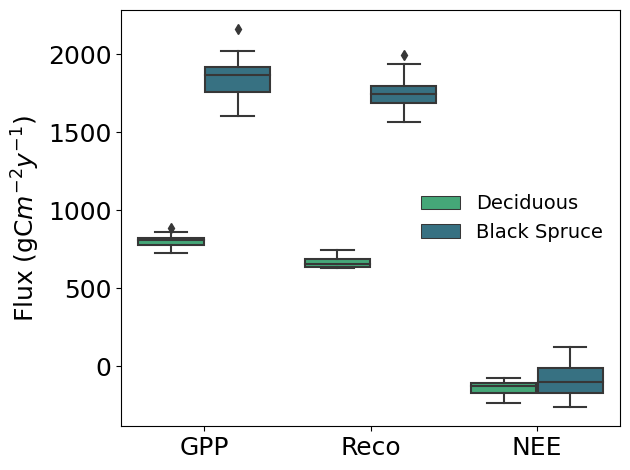

In [63]:
pal = sns.color_palette(['#35B779FF', '#2A788EFF'])

fig, ax = plt.subplots()
sns.boxplot(data = df_yearly_melt.loc[df_yearly_melt['year']>=2010], x='variable', y='value', hue='CMT', palette = pal)

ax.set_ylabel('Flux (gC$m^{-2}$$y^{-1}$)', fontsize=18)
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(title='', fontsize=14, frameon=False)
fig.tight_layout()
plt.savefig('output_figs/BONA/flux_boxplot.jpg', dpi=300)

In [64]:
df_yearly_melt.groupby(by=['CMT', 'variable']).mean()

year        value  order
CMT          variable                            
Black Spruce GPP       1961.5  1589.686172    0.0
             NEE       1961.5   -77.895984    2.0
             Reco      1961.5  1511.790188    1.0
Deciduous    GPP       1961.5   690.207844    0.0
             NEE       1961.5   -97.357067    2.0
             Reco      1961.5   592.850778    1.0

In [65]:
df_yearly_melt.groupby(by=['CMT', 'variable']).std()

year       value  order
CMT          variable                              
Black Spruce GPP       35.362409  156.835945    0.0
             NEE       35.362409   90.019715    0.0
             Reco      35.362409  152.764260    0.0
Deciduous    GPP       35.362409   66.826405    0.0
             NEE       35.362409   47.633562    0.0
             Reco      35.362409   54.126146    0.0

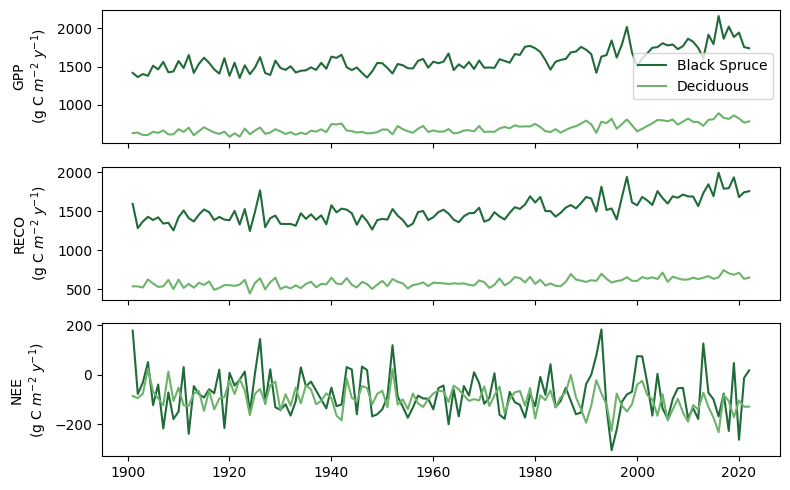

In [66]:
#sns.set_palette(sns.color_palette("Greys",2))
fig, axes=plt.subplots(3,1,figsize=(8,5))
sns.lineplot(data=df_bs_yearly, x='year', y='GPP', ax=axes[0], label = 'Black Spruce', color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='GPP', ax=axes[0], label = 'Deciduous', color=decid_color)
sns.lineplot(data=df_bs_yearly, x='year', y='RECO', ax=axes[1], color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='RECO', ax=axes[1], color=decid_color)
sns.lineplot(data=df_bs_yearly, x='year', y='NEE', ax=axes[2], color=ever_color)
sns.lineplot(data=df_br_yearly, x='year', y='NEE', ax=axes[2], color=decid_color)

axes[0].xaxis.set_tick_params(labelbottom=False)
axes[1].xaxis.set_tick_params(labelbottom=False)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('GPP\n(g C $m^{-2}$ $y^{-1}$)')
axes[1].set_ylabel('RECO\n(g C $m^{-2}$ $y^{-1}$)')
axes[2].set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
plt.xlabel('')
fig.tight_layout()
plt.savefig('output_figs/BONA/yearly_fluxes.jpg', dpi=300)


In [67]:
df_yearly.columns

Index(['year', 'GPP', 'NPP', 'RG', 'RG_root', 'RH', 'RM', 'RM_root', 'LWC_top',
       'TLAYER_top', 'EET', 'TRANSPIRATION', 'LAI', 'BURN', 'RECO', 'NEE',
       'CMT', 'ALD'],
      dtype='object')

<AxesSubplot:xlabel='year', ylabel='ALD'>

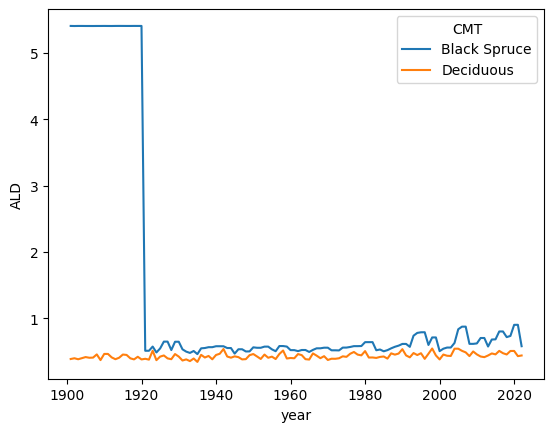

In [68]:
sns.lineplot(data=df_yearly, x='year', y='ALD', hue='CMT')
#plt.ylim(0,1)

In [69]:
bins=['2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', 
      '2050-2059', '2060-2069', '2070-2079', '2080-2089', '2090-2100']
df_bs_recent=df_bs_yearly.loc[df_bs_yearly.index>=2000]
df_br_recent=df_br_yearly.loc[df_br_yearly.index>=2000]

df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()

df_bs_recent.loc[df_bs_recent.index==2100, 'bin_index']=9
df_br_recent.loc[df_bs_recent.index==2100, 'bin_index']=9

/tmp/ipykernel_6433/1446786587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
/tmp/ipykernel_6433/1446786587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()


In [70]:
df_bs_recent['stand'] = 'Black Spruce'
df_br_recent['stand'] = 'Birch'
df_recent=pd.concat([df_bs_recent, df_br_recent])

/tmp/ipykernel_6433/3216363827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_recent['stand'] = 'Black Spruce'
/tmp/ipykernel_6433/3216363827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_recent['stand'] = 'Birch'


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (10).

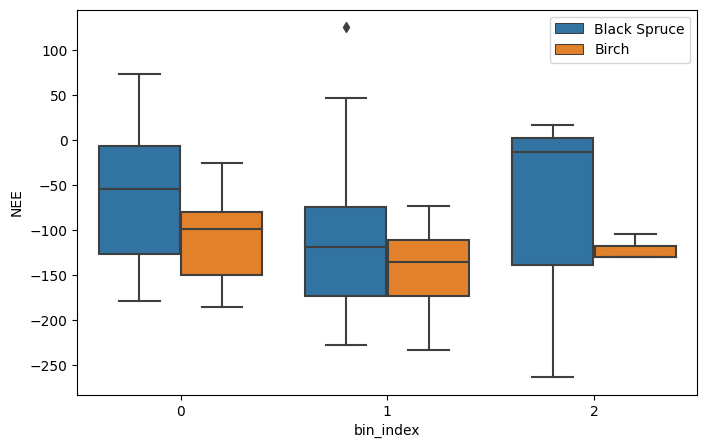

In [71]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

In [ ]:
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='RH')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='RH')

In [ ]:
a = 'sdaf/adfadsfa/asdfa/fs.tif'
b = '/'.join(a.split('/')[:-1]) + '/fused_landcover.tif'
b

In [ ]:
df_bs[['date', 'GPP', 'NPP', 'RH', 'RECO', 'NEE']].to_csv('BONA_Black_Spruce_flux_hist.csv')

In [ ]:
df_br[['date', 'GPP', 'NPP', 'RH', 'RECO', 'NEE']].to_csv('BONA_Birch_flux_hist.csv')